# Lab Assignment 11: Data Visualizations
## DS 6001: Practice and Application of Data Science

### Instructions
Please answer the following questions as completely as possible using text, code, and the results of code as needed. Format your answers in a Jupyter notebook. To receive full credit, make sure you address every part of the problem, and make sure your document is formatted in a clean and professional way.

## Problem 0
Import the following libraries:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Problem 1
Write a short paragraph that provides a critique of the following data visualizations. What's good about each figure, and what's not good? Pay particular attention to how well the figure communicates information to a general audience and tells a complete story. Make specific references to the ideas discussed in the first section of the Module 11 Jupyter notebook.

### Part a
<img src="https://i.reddituploads.com/09d4079fd0bf453586b8524478aac4fd?fit=max&h=1536&w=1536&s=0d63d22eed3d44a41002007990acdf2c" width='500'>

[1 point]

Probably the only good thing about this visualization is that the number do add up to 100%. Nothing else makes any sense. First of all, the bar height is not connected to the percentage value. For example, "VERY" bar with 34% is lower than "NOT AT ALL" bar with 13%. Similarly, "SOMEWHAT" choice with 28% appears to have zero height and "NOT VERY" with 25% has non-zero height. Also, it is not clear what is the order of the categories. Does "SOMEWHAT" mean less concerned than "NOT VERY"? In Edward Tufte terms, the chart fails to show "comparisons, contrasts, differences". This obviously leads to violation of second principal that should be aiming to show "causality, mechanism, explanation, systemic structure". There is also no attempt at integration or multivariate representation. 

### Part b
<img src="https://www.designyourway.net/diverse/2/wronginfo/59426786926.jpg" width='600'>

[1 point]

The only think I like is the color pallet maybe, but some colors regrettably overlap. Based on the guidance from Darrell Huff, this chart misrepresents the size of slices by "expanding the angles on the top and bottom and compresses the angles on the sides". Also, the title of the chart and slice labels do not make much sense. It is not obvious what "BIRTH RATES BY SECTOR" for example for "Property (9.6%) should mean. 

### Part c
<img src="https://i.imgur.com/sTVYOIH.jpg" width='400'>

[1 point]

There is nothing I like about this chart at all. First of all, y-axis is inverted, so peaks are actual valleys and it is not clear why. Second, x-axis does not have equal increments. Ten years from the 1990s to 2000s occupy close to 80-90% of real estate. The next ten years are all jammed together what makes all the slopes (increase/decrease in time series data) much more pronounces. Using Darrell’s Huff terms, this is the “Gee-Whiz” graph as it clearly manipulates the scale. In Wilke terms this chart does not tell a compelling story. In fact it distorts the data so much that it is hard to understand what the underlying story is. 

## Problem 2
For the rest of this lab, we will once again be working with the 2019 General Social Survey.

In [55]:
%%capture
gss = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/gss2018.csv",
                 encoding='cp1252', na_values=['IAP','IAP,DK,NA,uncodeable', 'NOT SURE',
                                               'DK', 'IAP, DK, NA, uncodeable', '.a', "CAN'T CHOOSE"])

Here is code that cleans the data and gets it ready to be used for data visualizations:

In [56]:
mycols = ['id', 'wtss', 'sex', 'educ', 'region', 'age', 'coninc',
          'prestg10', 'mapres10', 'papres10', 'sei10', 'satjob',
          'fechld', 'fefam', 'fepol', 'fepresch', 'meovrwrk'] 
gss_clean = gss[mycols]
gss_clean = gss_clean.rename({'wtss':'weight', 
                              'educ':'education', 
                              'coninc':'income', 
                              'prestg10':'job_prestige',
                              'mapres10':'mother_job_prestige', 
                              'papres10':'father_job_prestige', 
                              'sei10':'socioeconomic_index', 
                              'fechld':'relationship', 
                              'fefam':'male_breadwinner', 
                              'fehire':'hire_women', 
                              'fejobaff':'preference_hire_women', 
                              'fepol':'men_bettersuited', 
                              'fepresch':'child_suffer',
                              'meovrwrk':'men_overwork'},axis=1)
gss_clean.age = gss_clean.age.replace({'89 or older':'89'})
gss_clean.age = gss_clean.age.astype('float')

The `gss_clean` dataframe now contains the following features:

* `id` - a numeric unique ID for each person who responded to the survey
* `weight` - survey sample weights
* `sex` - male or female
* `education` - years of formal education
* `region` - region of the country where the respondent lives
* `age` - age
* `income` - the respondent's personal annual income
* `job_prestige` - the respondent's occupational prestige score, as measured by the GSS using the methodology described above
* `mother_job_prestige` - the respondent's mother's occupational prestige score, as measured by the GSS using the methodology described above
* `father_job_prestige` -the respondent's father's occupational prestige score, as measured by the GSS using the methodology described above
* `socioeconomic_index` - an index measuring the respondent's socioeconomic status
* `satjob` - responses to "On the whole, how satisfied are you with the work you do?"
* `relationship` - agree or disagree with: "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work."
* `male_breadwinner` - agree or disagree with: "It is much better for everyone involved if the man is the achiever outside the home and the woman takes care of the home and family."
* `men_bettersuited` - agree or disagree with: "Most men are better suited emotionally for politics than are most women."
* `child_suffer` - agree or disagree with: "A preschool child is likely to suffer if his or her mother works."
* `men_overwork` - agree or disagree with: "Family life often suffers because men concentrate too much on their work."

### Part a
Reorder the categories of `relationship` to "strongly agree", "agree", "disagree", and "strongly disagree".

Then create a simple barplot that shows the frequencies of the categories of `relationship` three times: 
* once using `matplotlib` alone, 
* once using `seaborn`, 
* and once using the `.plot()` method from `pandas`. 

Make sure each barplot has descriptive axis labels and a title, and set a good size for each figure displayed in the Jupyter notebook. [2 points]

In [57]:
# Check unique values in the Relationship column
gss_clean.relationship.unique()

array(['strongly agree', nan, 'agree', 'disagree', 'strongly disagree'],
      dtype=object)

In [58]:
# Check how many missing values are there
gss_clean.relationship.isnull().sum()

798

In [59]:
# Drop the missing values 
gss_clean.dropna(subset=["relationship"], inplace=True)
gss_clean.relationship.isnull().sum()

0

In [60]:
gss_clean.relationship.value_counts().index

Index(['agree', 'strongly agree', 'disagree', 'strongly disagree'], dtype='object')

In [63]:
gss_clean.relationship = gss_clean.relationship.astype('category')
gss_clean.relationship = gss_clean.relationship.cat.reorder_categories(
    ['strongly agree', 'agree', 'disagree', 'strongly disagree'])
mybars = gss_clean.relationship.value_counts().sort_index()
mybars

strongly agree       480
agree                670
disagree             324
strongly disagree     76
Name: relationship, dtype: int64

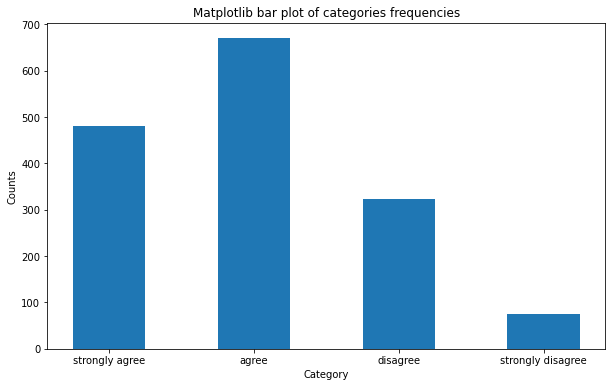

In [73]:
# Matplotlib bar plot 
plt.figure(figsize=(10, 6))
plt.bar(mybars.index, mybars.values, width=0.5)
plt.xlabel('Category') 
plt.ylabel('Counts') 
plt.title("Matplotlib bar plot of categories frequencies")
plt.show()

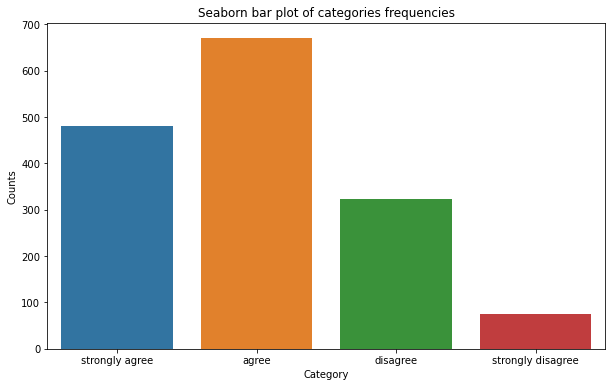

In [116]:
# Seaborn bar plot
mybars_df = mybars.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="index", y="relationship", data=mybars_df)
plt.xlabel('Category') 
plt.ylabel('Counts') 
plt.title("Seaborn bar plot of categories frequencies")
plt.show()

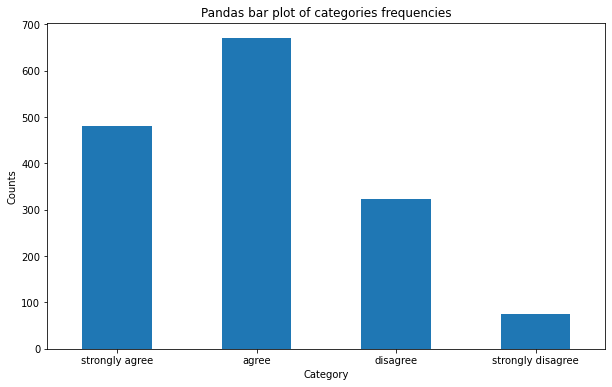

In [79]:
# Pandas bar plot
plt.figure(figsize=(10, 6))
gss_clean.relationship.value_counts().sort_index().plot(kind='bar', rot=0)
plt.xlabel('Category') 
plt.ylabel('Counts') 
plt.title("Pandas bar plot of categories frequencies")
plt.show()

### Part b
Create two barplots that show 
* the frequency of the different levels of agreement for `relationship` for men and for women on the same plot, 
* with bars for men and bars for women side-by-side,
* using different colors for the bars for men and the bars for women,
* listing these colors and the sex they refer to in a legend,
* and labeling each bar with the number the bar represents.

Create the first barplot using `seaborn` with the bars oriented vertically, and create the second barplot using the `.plot()` method with the bars oriented horizontally. [2 points]

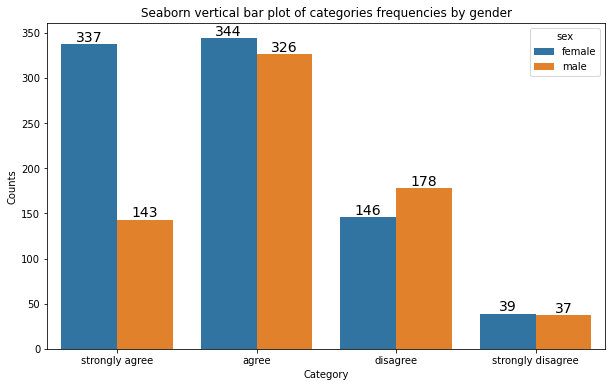

In [155]:
# Vertically oriented seaborn plot:

# Define dataframe
gender_df = gss_clean.groupby(['sex', 'relationship']).size()
gender_df = gender_df.reset_index()
gender_df = gender_df.rename({0:'count'}, axis=1)

# Define plot object
plt.figure(figsize=(10, 6))
myplot = sns.barplot(x='relationship', y='count', hue='sex', data=gender_df)
plt.xlabel('Category') 
plt.ylabel('Counts') 
plt.title('Seaborn vertical bar plot of categories frequencies by gender')

# Loop through patched to pick up coordinates
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)
plt.show()

In [150]:
gender_df

,sex,relationship,count
0,female,strongly agree,337
1,female,agree,344
2,female,disagree,146
3,female,strongly disagree,39
4,male,strongly agree,143
5,male,agree,326
6,male,disagree,178
7,male,strongly disagree,37


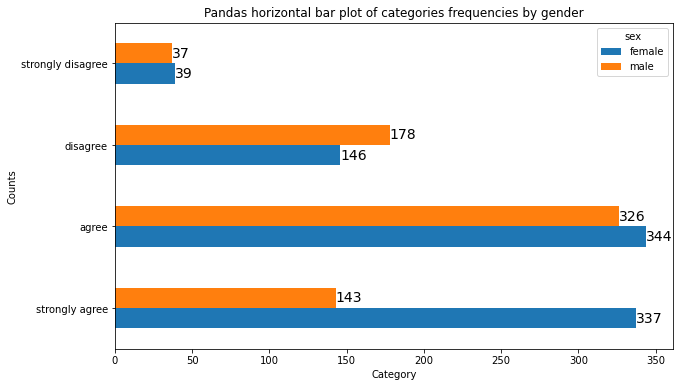

In [156]:
# Horizontally oriented pandas plot

# Take a new snapshot of data in crosstabulated format
xtab = pd.crosstab(gss_clean.relationship, gss_clean.sex)

# Define the plot object
myplot = xtab.plot(kind='barh', figsize = [10, 6])
plt.xlabel('Category') 
plt.ylabel('Counts') 
plt.title('Pandas horizontal bar plot of categories frequencies by gender')

# Loop through patches to pick up coordinates
for rect in myplot.patches:
    ycoor = rect.get_y() + .5*rect.get_height()
    xcoor = rect.get_width()
    plt.text(xcoor, ycoor, str(int(xcoor)), 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14)


### Part c
Create a visualization with 
* nine barplots, arranged in a 3x3 grid. 
* The barplots should refer to each of the nine categories of `region`, 
* and each barplot should be given a label that contains the name of the region.
* Within each barplot, list the categories of `relationship`,
* and display horizontal bars.

Only one figure is required. Use `seaborn`, `matplotlib`, and `.plot()` as you see fit. [2 points]

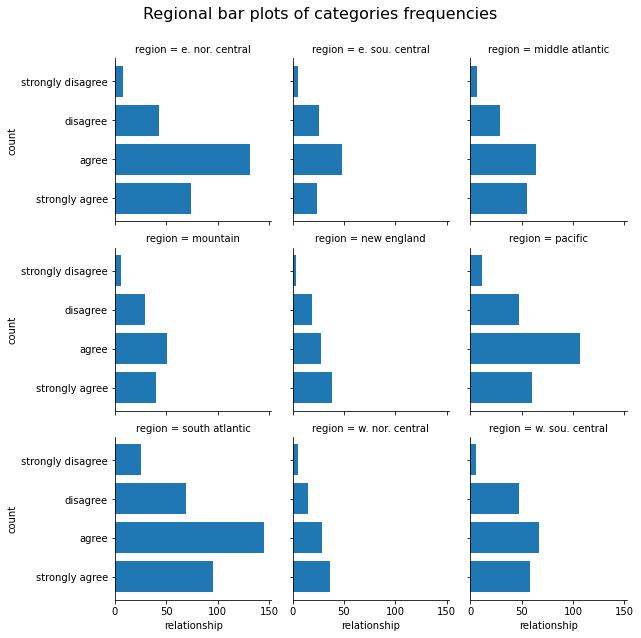

In [184]:
# Take a new dataframe snapshot
region_df = gss_clean.groupby(['region', 'relationship']).size().reset_index()
region_df = region_df.rename({0:'count'}, axis=1)

# Define the plots on FacetGrid
g = sns.FacetGrid(region_df, col = 'region', col_wrap=3, height=3, aspect=1)
g.map(plt.barh, 'relationship', 'count')
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Regional bar plots of categories frequencies', fontsize=16)
plt.show()

## Problem 3
Write code that exactly replicates the following figures, including all aesthetic choices. **Don't worry, however, about making the size of the figures exactly the same as that varies from browser to browser.** All of the following figures are generated by a primary graphing function from `seaborn`. 

### Part a
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/parta.png" width='700'>

[Hint: the values of occuptational prestige and socioeconomic status are the means of `job_prestige` and `socioeconomic_index` within years of `education`. Note that values of `education` less than 8 are excluded.] [2 points]

In [243]:
# New melted dataframe
index_df = pd.melt(gss_clean.reset_index(),
                       id_vars = 'education',
                       value_vars=['job_prestige','socioeconomic_index'])
# Rename columns and categories to match the example
index_df.columns = ['Education', 'Index', 'Value' ]
index_df.Index = index_df.Index.replace({'job_prestige': 'Occupational Prestige', 
                                         'socioeconomic_index': 'Socioeconomic Status'})

In [244]:
# Center output in this jupyter notebook 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

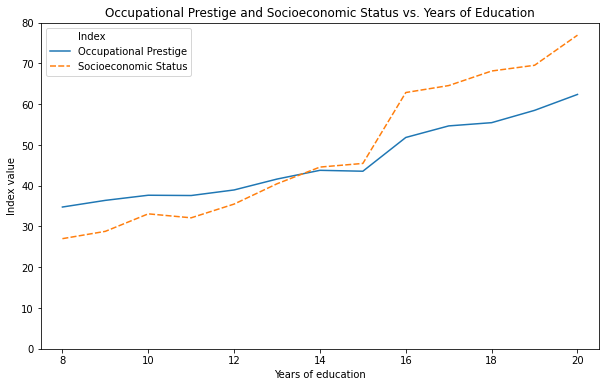

In [250]:
# Define the sns plot
plt.figure(figsize=(10,6))
sns.lineplot(x='Education', y='Value', 
             hue='Index', style='Index', 
             data = index_df.query("Education >= 8"), 
             ci=None)

# Labels and titles
plt.xlabel('Years of education')
plt.ylabel('Index value')
plt.title('Occupational Prestige and Socioeconomic Status vs. Years of Education')
plt.xlim(7.5,20.5)
plt.ylim(0, 80)
plt.show()

### Part b
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/partb.png" width='700'>

[Hint: to match the color scheme, you will need to set `center=0`.] [2 points]

In [267]:
# New economic indicators dataframe
econindic_df = gss_clean[['job_prestige',
                          'mother_job_prestige',
                          'father_job_prestige',
                          'income',
                          'socioeconomic_index']].copy()

In [270]:
# Drop missing values
econindic_df.dropna(inplace=True)

In [272]:
# Cast to float data type
econindic_df = econindic_df.astype('float')

In [273]:
# Compute linear correlations
my_corr = econindic_df.corr()

Text(0.5, 1.0, 'Correlation Between Personal Economic Indicators')

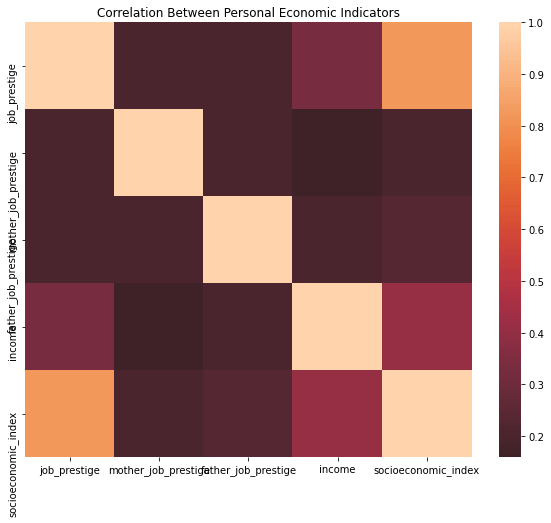

In [293]:
# Define the heatmap chart
plt.figure(figsize = (10,8))
sns.heatmap(my_corr, center=0)
plt.xticks(rotation=360)
plt.yticks(rotation=90)
plt.title("Correlation Between Personal Economic Indicators")

### Part c
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localdata/partc2.png" width='600'>

[Hint: The individual plots inside the grid have `height=4` and `aspect=1`, and to include the overall title I used
```
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
```
You will first need to create a version of `education` that collapses values from 0 to 10 to "10 years or fewer" and collapses values from 17 to 20 to "More than 16 years". You can use `.map()`, `.replace()`, or `pd.cut()` to do that.] [3 points]

In [316]:
# Create a new dataframe education_df
education_df = gss_clean[['education', 'income', 'job_prestige']].reset_index()
education_df.head()

,index,education,income,job_prestige
0,0,14.0,NaN,47.0
1,2,16.0,112160.0000,61.0
2,3,16.0,158201.8412,59.0
3,5,16.0,NaN,53.0
4,8,8.0,3855.5000,35.0


In [322]:
# Check the missing values as these NaNs can't be plotted
education_df.isnull().sum()

index             0
education         1
income          128
job_prestige     59
dtype: int64

In [323]:
# Drop the missing values
education_df.dropna(inplace=True)

In [346]:
# Check what values "education" columns has
education_df['education'].unique()

array([16.,  8., 12., 19., 14., 13., 15., 20., 18., 17.,  9., 10.,  7.,
        2., 11.,  3.,  0.,  5.,  6.,  4.])

In [351]:
# Convert to categorical education based groups
education_df['edu_group'] = pd.cut(education_df['education'],
                                   bins = [-1, 10, 11, 12, 13, 14, 15, 16, 20],
                                   labels = ['10 years or fewer', 
                                             '11', '12', '13', '14', '15', '16', 
                                             'More than 16 years'])

education_df['edu_group'].unique()

['16', '10 years or fewer', '12', 'More than 16 years', '14', '13', '15', '11']
Categories (8, object): ['10 years or fewer' < '11' < '12' < '13' < '14' < '15' < '16' < 'More than 16 years']

In [352]:
# Check if everything was mapped, i.e. no NaNa
education_df.isnull().sum()

index           0
education       0
income          0
job_prestige    0
edu_group       0
dtype: int64

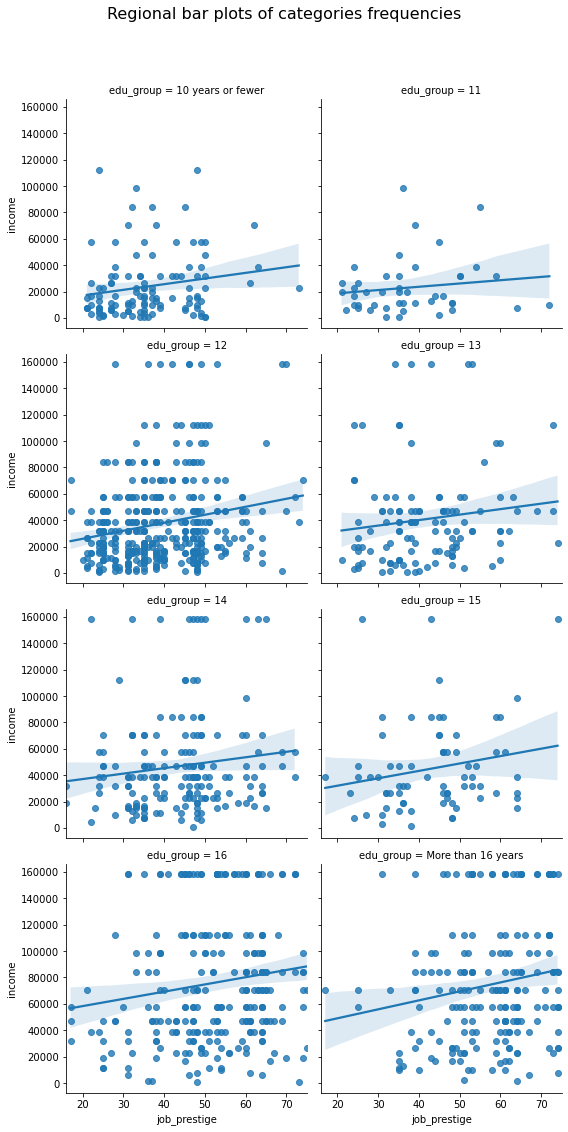

In [359]:
# Define the plots on FacetGrid
g = sns.FacetGrid(education_df, col = 'edu_group', col_wrap=2, height=4, aspect=1)
g.map(sns.regplot, 'job_prestige', 'income')
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
plt.show()

## Problem 4
There is a consistent finding that in the United States that [women get paid only 80% of what men get paid](https://nwlc.org/issue/equal-pay-and-the-wage-gap/). Other research however finds that the gap is much smaller when comparing [men and women who hold the same job](https://www.politifact.com/factchecks/2018/apr/13/tina-smith/do-women-get-only-80-percent-pay-men-do-same-job/). In this problem you will use the GSS data to investigate the following questions:

1. Do men have higher incomes than women?

2. If there is a difference, is this difference due to the fact that men have jobs with higher occupational prestige than women?

You may use any kind of data visualization and you may use multiple visualizations to find an answer to these questions. In order to receive credit for this problem, you must write in text what parts of your visualizations are important and what we should learn from the visualizations to answer the questions. Please consider the entire distributions of income and occupational prestige, not just the means or medians. [4 points]